# Занятие 2

In [1]:
import pandas as pd
import numpy as np

# Создание данных
np.random.seed(0)  # Для воспроизводимости результатов
data = {
    'Время': pd.date_range(start='2024-01-01', periods=100, freq='h'),
    # нормальное распределение вокруг 350 градусов
    # loc - среднее значение, scale - стандартное отклонение
    'Температура': np.random.normal(loc=350, scale=10, size=100),
    # нормальное распределение вокруг 150 бар
    'Давление': np.random.normal(loc=150, scale=5, size=100),
    # нормальное распределение вокруг 0.05 рад
    'Уровень радиации': np.random.normal(loc=0.05, scale=0.01, size=100)
}

df = pd.DataFrame(data)

In [2]:
# Вывод первых нескольких записей
print("Начальные данные:")
df.head()

Начальные данные:


,Время,Температура,Давление,Уровень радиации
0,2024-01-01 00:00:00,367.640523,159.415753,0.046308
1,2024-01-01 01:00:00,354.001572,143.261205,0.047606
2,2024-01-01 02:00:00,359.787380,143.647575,0.060997
3,2024-01-01 03:00:00,372.408932,154.846984,0.056553
4,2024-01-01 04:00:00,368.675580,144.134383,0.056401


In [3]:
# Базовый статистический анализ
print("Основные статистические данные:")
df.describe()

Основные статистические данные:


,Температура,Давление,Уровень радиации
count,100.000000,100.000000,100.000000
mean,350.598080,150.410065,0.049408
std,10.129598,5.199397,0.009568
min,324.470102,138.882984,0.022274
25%,343.561433,146.272851,0.044034
50%,350.940961,150.123274,0.049246
75%,357.370774,154.237399,0.055387
max,372.697546,161.915724,0.073039


In [4]:
# Добавление вычисляемого столбца
df['Опасная температура'] = df['Температура'] > 360

print("Данные с маркировкой опасных температур:")
df.head()

Данные с маркировкой опасных температур:


,Время,Температура,Давление,Уровень радиации,Опасная температура
0,2024-01-01 00:00:00,367.640523,159.415753,0.046308,True
1,2024-01-01 01:00:00,354.001572,143.261205,0.047606,False
2,2024-01-01 02:00:00,359.787380,143.647575,0.060997,False
3,2024-01-01 03:00:00,372.408932,154.846984,0.056553,True
4,2024-01-01 04:00:00,368.675580,144.134383,0.056401,True


In [5]:
# Фильтрация по условию
dangerous_conditions = df[(df['Температура'] > 360) | (df['Давление'] > 155)]

print("Опасные условия работы реактора:")
dangerous_conditions.head()

Опасные условия работы реактора:


,Время,Температура,Давление,Уровень радиации,Опасная температура
0,2024-01-01 00:00:00,367.640523,159.415753,0.046308,True
3,2024-01-01 03:00:00,372.408932,154.846984,0.056553,True
4,2024-01-01 04:00:00,368.675580,144.134383,0.056401,True
5,2024-01-01 05:00:00,340.227221,159.718106,0.033830,False
8,2024-01-01 08:00:00,348.967811,159.614710,0.052799,False


In [6]:
# Группировка и агрегирование

# resample - ресемплирование (процесс изменения частоты временных данных)
# h (частота) - по часам, on='Время' - столбец,
by_hours = df.resample('h', on='Время').mean()

print("Средние значения по часам:")
by_hours.head()

Средние значения по часам:


,Температура,Давление,Уровень радиации,Опасная температура
Время,,,,
2024-01-01 00:00:00,367.640523,159.415753,0.046308,1.0
2024-01-01 01:00:00,354.001572,143.261205,0.047606,0.0
2024-01-01 02:00:00,359.787380,143.647575,0.060997,0.0
2024-01-01 03:00:00,372.408932,154.846984,0.056553,1.0
2024-01-01 04:00:00,368.675580,144.134383,0.056401,1.0


In [7]:
# Скользящее среднее для сглаживания временных рядов

# Метод rolling(window=3) создает скользящее окно размером 3
# (то есть, окно будет включать текущее значение и два предыдущих)
df['Скользящее среднее температуры'] = df['Температура'].rolling(
    window=3).mean()

print("Скользящее среднее температуры:")
df[['Время', 'Температура', 'Скользящее среднее температуры']].head()

Скользящее среднее температуры:


,Время,Температура,Скользящее среднее температуры
0,2024-01-01 00:00:00,367.640523,NaN
1,2024-01-01 01:00:00,354.001572,NaN
2,2024-01-01 02:00:00,359.787380,360.476492
3,2024-01-01 03:00:00,372.408932,362.065961
4,2024-01-01 04:00:00,368.675580,366.957297


In [8]:
# Использование NumPy для расчета корреляции
correlation = np.corrcoef(df['Температура'], df['Давление'])

print("Корреляция между температурой и давлением:")
print(correlation)

Корреляция между температурой и давлением:
[[1.        0.1117292]
 [0.1117292 1.       ]]


In [9]:
# Преобразование данных (нормализация)
df['Нормализованное давление'] = (
    df['Давление'] - df['Давление'].min()) / (df['Давление'].max() - df['Давление'].min())

print("Нормализованные значения давления:")
df[['Время', 'Давление', 'Нормализованное давление']].head()

Нормализованные значения давления:


,Время,Давление,Нормализованное давление
0,2024-01-01 00:00:00,159.415753,0.891460
1,2024-01-01 01:00:00,143.261205,0.190087
2,2024-01-01 02:00:00,143.647575,0.206862
3,2024-01-01 03:00:00,154.846984,0.693100
4,2024-01-01 04:00:00,144.134383,0.227997


# Домашнее задание 2*

Разработайте функцию для вычисления скользящего стандартного отклонения по любому из параметров (например, температура или давление) с настраиваемым размером окна. Примените эту функцию к данным и проанализируйте результаты.

In [10]:
import pandas as pd
import numpy as np

# Создание данных
np.random.seed(0)  # Для воспроизводимости результатов
data = {
    'Время': pd.date_range(start='2024-01-01', periods=100, freq='h'),
    # нормальное распределение вокруг 350 градусов
    # loc - среднее значение, scale - стандартное отклонение
    'Температура': np.random.normal(loc=350, scale=10, size=100),
    # нормальное распределение вокруг 150 бар
    'Давление': np.random.normal(loc=150, scale=5, size=100),
    # нормальное распределение вокруг 0.05 рад
    'Уровень радиации': np.random.normal(loc=0.05, scale=0.01, size=100)
}

df = pd.DataFrame(data)

In [11]:
def calculate_rolling_std(dataframe, column_name, window_size):
    """
    Функция для вычисления скользящего стандартного отклонения для указанного столбца DataFrame.

    Параметры:
    - dataframe: DataFrame, в котором содержатся данные.
    - column_name: str, имя столбца, для которого нужно вычислить скользящее стандартное отклонение.
    - window_size: int, размер окна для вычисления скользящего стандартного отклонения.

    Возвращает:
    - pandas.Series, содержащий скользящее стандартное отклонение.
    """
    rolling_std = dataframe[column_name].rolling(window=window_size).std()
    return rolling_std

window_size = 3
rolling_std_temperature = calculate_rolling_std(df, 'Температура', window_size)

# Добавление столбца со скользящим стандартным отклонением в DataFrame
df['Скользящее стандартное отклонение'] = rolling_std_temperature

# Вывод DataFrame
df[['Время', 'Температура', 'Скользящее стандартное отклонение']].head()

,Время,Температура,Скользящее стандартное отклонение
0,2024-01-01 00:00:00,367.640523,NaN
1,2024-01-01 01:00:00,354.001572,NaN
2,2024-01-01 02:00:00,359.787380,6.845539
3,2024-01-01 03:00:00,372.408932,9.412846
4,2024-01-01 04:00:00,368.675580,6.483847


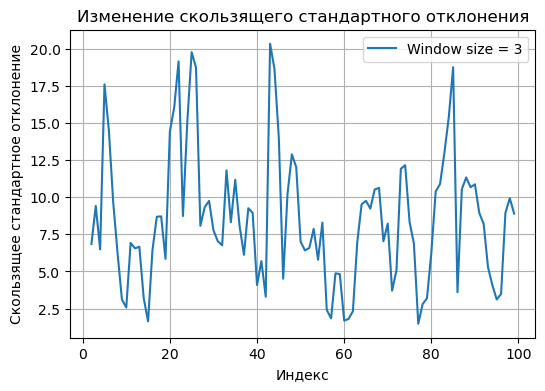

In [13]:
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(6, 4))

rolling_std = calculate_rolling_std(df, 'Температура', window_size)
plt.plot(rolling_std, label=f'Window size = {window_size}')

plt.title('Изменение скользящего стандартного отклонения')
plt.xlabel('Индекс')
plt.ylabel('Скользящее стандартное отклонение')
plt.legend()
plt.grid(True)
plt.show()

Скользящее стандартное отклонение меняется в больших пределах, видны резкие скачки

### Влияние размера окна на изменение скользящего стандартного отклонения

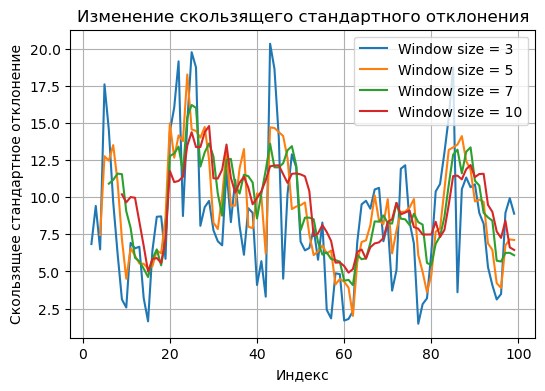

In [14]:
# Размеры окон для скользящего стандартного отклонения
window_sizes = [3, 5, 7, 10]

# Создание графика для каждого размера окна
plt.figure(figsize=(6, 4))
for window_size in window_sizes:
    rolling_std = calculate_rolling_std(df, 'Температура', window_size)
    plt.plot(rolling_std, label=f'Window size = {window_size}')

plt.title(
    'Изменение скользящего стандартного отклонения')
plt.xlabel('Индекс')
plt.ylabel('Скользящее стандартное отклонение')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** скользящее стандартное отклонение зависит от изменения размера окна следующим образом. С увеличением размера окна кривая сглаживается, скачки становятся не такими резкими